### Importing Libraries

In [45]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Reading Data

In [46]:
df=pd.read_csv('balanced_data.csv')

In [47]:
df.shape

(13818, 7)

In [48]:
df.columns

Index(['Core Subjects Percentage', 'Logical quotient rating', 'hackathons',
       'coding skills rating', 'public speaking points',
       'reading and writing skills', 'status'],
      dtype='object')

In [49]:
df.head()

,Core Subjects Percentage,Logical quotient rating,hackathons,coding skills rating,public speaking points,reading and writing skills,status
0,73.75,7,1,2,3,0,not placed
1,63.75,2,2,8,6,1,not placed
2,71.50,5,3,6,5,0,not placed
3,72.50,6,2,3,8,0,not placed
4,73.25,7,6,5,8,1,not placed


### Descriptive Statistics

In [51]:
df.describe()

,Core Subjects Percentage,Logical quotient rating,hackathons,coding skills rating,public speaking points,reading and writing skills
count,13818.000000,13818.000000,13818.000000,13818.000000,13818.000000,13818.000000
mean,75.694857,6.241858,3.992691,6.261036,5.104212,0.971993
std,5.131870,2.355250,1.818147,2.352017,2.536752,0.817153
min,60.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,72.000000,5.000000,3.000000,5.000000,3.000000,0.000000
50%,74.750000,7.000000,4.000000,7.000000,5.000000,1.000000
75%,79.500000,8.000000,5.000000,8.000000,7.000000,2.000000
max,90.750000,10.000000,7.000000,9.000000,10.000000,2.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13818 entries, 0 to 13817
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Core Subjects Percentage    13818 non-null  float64
 1   Logical quotient rating     13818 non-null  int64  
 2   hackathons                  13818 non-null  int64  
 3   coding skills rating        13818 non-null  int64  
 4   public speaking points      13818 non-null  int64  
 5   reading and writing skills  13818 non-null  int64  
 6   status                      13818 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 755.8+ KB


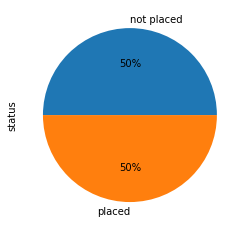

In [53]:
df['status'].value_counts().plot(kind='pie',autopct='%.f%%');

In [54]:
df['status'].unique()

array(['not placed', 'placed'], dtype=object)

### Converting Object to numerical

In [55]:
df['status']=df['status'].map({'not placed':0, 'placed':1})

In [56]:
df['status'].value_counts()

1    6909
0    6909
Name: status, dtype: int64

In [57]:
df.columns

Index(['Core Subjects Percentage', 'Logical quotient rating', 'hackathons',
       'coding skills rating', 'public speaking points',
       'reading and writing skills', 'status'],
      dtype='object')

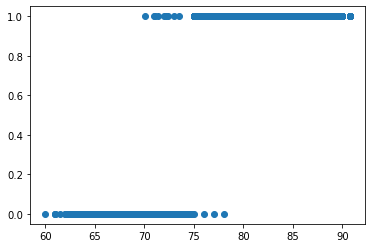

In [59]:
plt.scatter(x='Core Subjects Percentage',y='status',data=df);

In [60]:
df[['Logical quotient rating','hackathons','coding skills rating','public speaking points'
    ,'reading and writing skills']].mode()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,reading and writing skills
0,6,5,8,8,0


In [61]:
def count_plot(col):
    print(df[col].value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


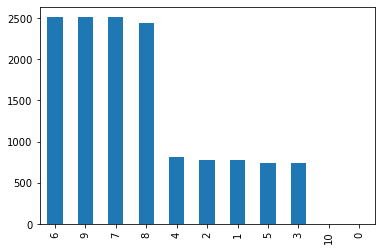

In [62]:
count_plot('Logical quotient rating')

AxesSubplot(0.125,0.125;0.775x0.755)


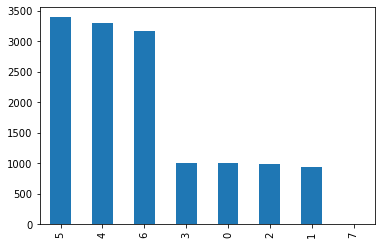

In [63]:
count_plot('hackathons')

AxesSubplot(0.125,0.125;0.775x0.755)


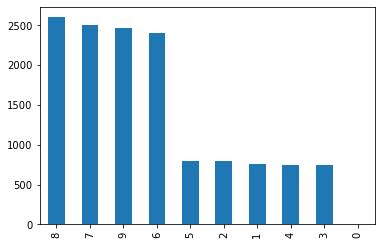

In [64]:
count_plot('coding skills rating')

AxesSubplot(0.125,0.125;0.775x0.755)


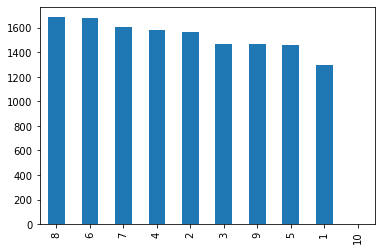

In [65]:
count_plot('public speaking points')

AxesSubplot(0.125,0.125;0.775x0.755)


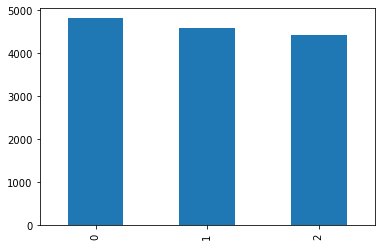

In [66]:
count_plot('reading and writing skills')

In [67]:
df.isna().sum()

Core Subjects Percentage      0
Logical quotient rating       0
hackathons                    0
coding skills rating          0
public speaking points        0
reading and writing skills    0
status                        0
dtype: int64

### Spitting data

In [68]:
X=df.drop(['status'],axis=1)
y=df['status']

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)

### Models

In [70]:
lr=LogisticRegression()
svm=SVC()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()

In [71]:
lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
gb.fit(X_train,y_train)

C:\Users\BHARAT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [72]:
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9968644476603956


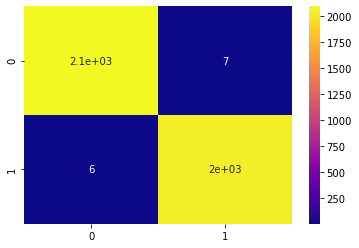

In [73]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True,cmap='plasma');

In [74]:
y_pred = svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9934876989869754


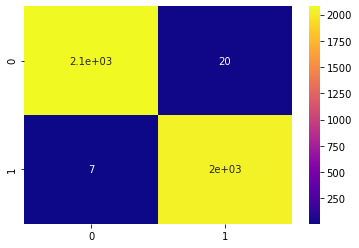

In [75]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True,cmap='plasma');

In [76]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9951760733236855


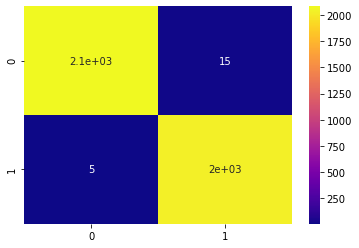

In [77]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True,cmap='plasma');

In [78]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9983116256632899


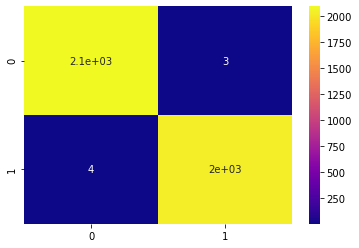

In [79]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True,cmap='plasma');

In [80]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9990352146647371


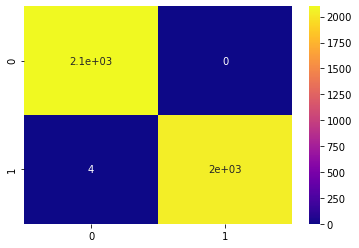

In [81]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True,cmap='plasma');

In [82]:
y_pred=gb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9990352146647371


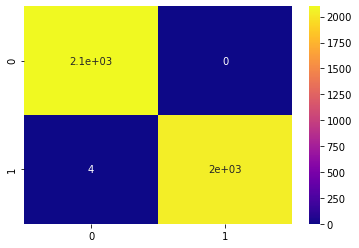

In [83]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True,cmap='plasma');

In [84]:
df.columns

Index(['Core Subjects Percentage', 'Logical quotient rating', 'hackathons',
       'coding skills rating', 'public speaking points',
       'reading and writing skills', 'status'],
      dtype='object')

In [85]:
def get_result():
    input_features=[]
    percentage=float(input("Enter overall percentage:"))
    input_features.append(percentage)
    logicalrating=int(input("Enterlogical rating  between 1 to 10:"))
    input_features.append(logicalrating)
    hackathons=int(input("Enter number of hackathons participated:"))
    input_features.append(hackathons)
    coding=int(input("enter coding rating between 1 to 10:"))
    input_features.append(coding)
    speaking=int(input("enter speaking rating between 1 to 10:"))
    input_features.append(speaking)
    rw=int(input("Enter reading and wring rating 0(poor) or 1(good) or  2(excellent):"))
    input_features.append(rw)
    result=gb.predict([input_features])
    if result==1:
        print('Will get placed')
    else:
        print('Need to Improve Skills')

In [86]:
get_result()

Enter overall percentage:80
Enterlogical rating  between 1 to 10:7
Enter number of hackathons participated:3
enter coding rating between 1 to 10:8
enter speaking rating between 1 to 10:7
Enter reading and wring rating 0(poor) or 1(good) or  2(excellent):1
Will get placed


C:\Users\BHARAT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [87]:
get_result()

Enter overall percentage:60
Enterlogical rating  between 1 to 10:3
Enter number of hackathons participated:0
enter coding rating between 1 to 10:4
enter speaking rating between 1 to 10:5
Enter reading and wring rating 0(poor) or 1(good) or  2(excellent):1
Need to Improve Skills


C:\Users\BHARAT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [88]:
import pickle
file = open('campusplacementpredictor.pkl','wb')
pickle.dump(gb,file)
file.close()

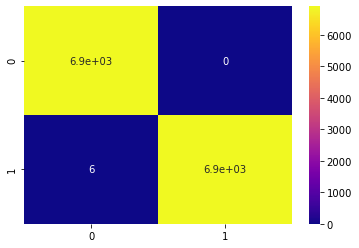

In [89]:
cm = confusion_matrix(y,gb.predict(X))
sb.heatmap(cm,annot=True,cmap='plasma');